In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Step 1: Load the Iris Dataset
import pandas as pd

def load_iris_dataset(file_path="./data/iris.csv"):
    iris = pd.read_csv("./data/iris.csv")
    return iris


# Replace 'Iris-' in the 'Species' column
iris['Species'] = iris['Species'].str.replace('Iris-', '', regex=False)

# Display the first few rows of the modified dataset
print(iris.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species  \
0   1            5.1           3.5            1.4           0.2  setosa   
1   2            4.9           3.0            1.4           0.2  setosa   
2   3            4.7           3.2            1.3           0.2  setosa   
3   4            4.6           3.1            1.5           0.2  setosa   
4   5            5.0           3.6            1.4           0.2  setosa   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


In [19]:
# Select specific columns (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)
x = iris.iloc[:, [1, 2, 3, 4]]

# Convert the selected columns to a NumPy array
x = np.array(x)
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

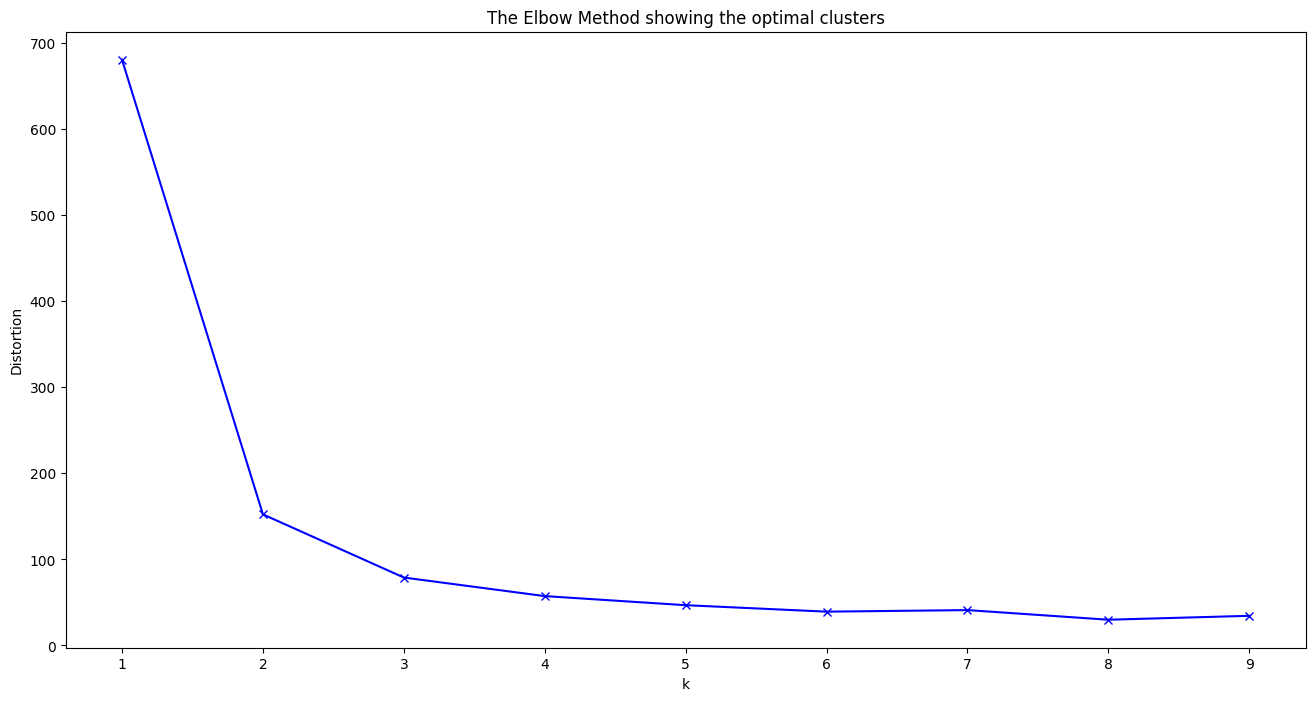

In [20]:
# Determine the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()


In [21]:
# Define the model
kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=32932)

In [22]:
# Fit into our dataset
kmeans_predict = kmeans_model.fit_predict(x)

In [23]:
# Display cluster centers
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [24]:
# Assign the cluster labels to the dataset
iris['Cluster'] = kmeans_predict
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,1
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


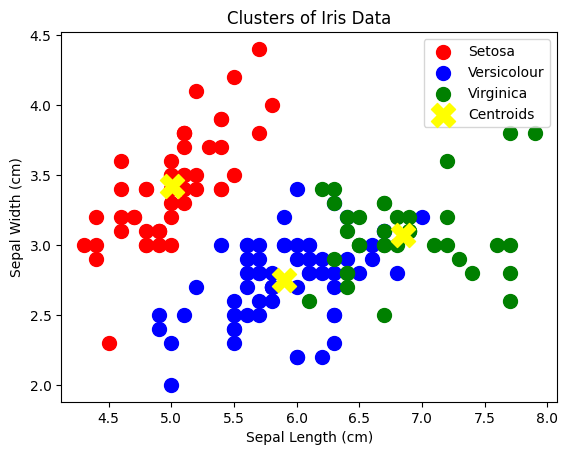

In [25]:
# Visualizing the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], 
            s=100, c='red', label='Setosa')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], 
            s=100, c='blue', label='Versicolour')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], 
            s=100, c='green', label='Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='X')

# Adding legend and labels
plt.title("Clusters of Iris Data")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()
